In [1]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization

import cv2

from keras import regularizers


In [2]:
train_dir = "train"
test_dir = "test"  

In [3]:
img_size = 48

In [ ]:

# Data Augmentation
# applied 
# rotation_range = rotates the image with the amount of degrees we provide
# width_shift_range = shifts the image randomly to the right or left along the width of the image
# height_shift range = shifts image randomly to up or below along the height of the image
# horizontal_flip = flips the image horizontally
# rescale = to scale down the pizel values in our image between 0 and 1
# zoom_range = applies random zoom to our object
# validation_split = reserves some images to be used for validation purpose


In [4]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [12]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [13]:
epochs = 50
batch_size = 64

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)      

In [16]:
from keras.callbacks import ReduceLROnPlateau
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)

In [17]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator,callbacks=[rlrp])

Epoch 1/50
359/359 [==============================] - 303s 844ms/step - loss: 1.7915 - accuracy: 0.3072 - val_loss: 1.7192 - val_accuracy: 0.3052 - lr: 0.0010
Epoch 2/50
359/359 [==============================] - 264s 735ms/step - loss: 1.5285 - accuracy: 0.4120 - val_loss: 1.4157 - val_accuracy: 0.4630 - lr: 0.0010
Epoch 3/50
359/359 [==============================] - 262s 729ms/step - loss: 1.3580 - accuracy: 0.4773 - val_loss: 1.2769 - val_accuracy: 0.5028 - lr: 0.0010
Epoch 4/50
359/359 [==============================] - 225s 626ms/step - loss: 1.2828 - accuracy: 0.5088 - val_loss: 1.2071 - val_accuracy: 0.5398 - lr: 0.0010
Epoch 5/50
359/359 [==============================] - 219s 611ms/step - loss: 1.2194 - accuracy: 0.5381 - val_loss: 1.1419 - val_accuracy: 0.5649 - lr: 0.0010
Epoch 6/50
359/359 [==============================] - 237s 659ms/step - loss: 1.1811 - accuracy: 0.5505 - val_loss: 1.1136 - val_accuracy: 0.5866 - lr: 0.0010
Epoch 7/50
359/359 [==========================

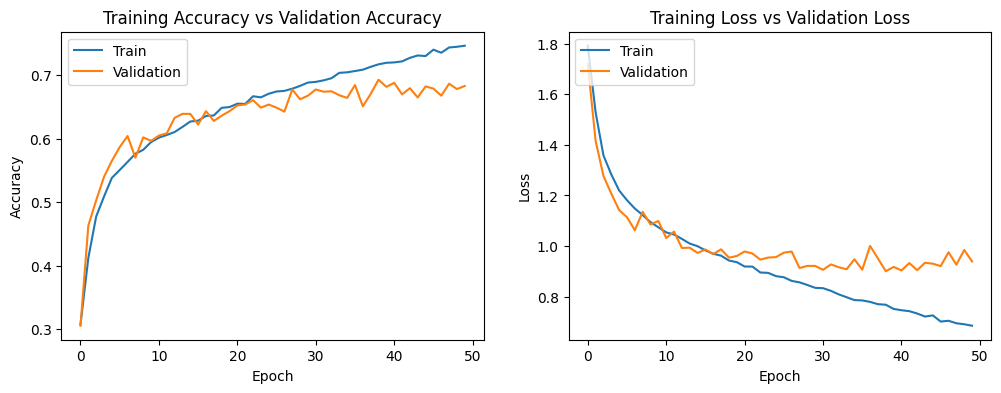

In [18]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [19]:
model_json = model.to_json()
with open("model_optimal.json","w") as json_file:
    json_file.write(model_json)

In [23]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 5s 207ms/step - loss: 0.9392 - accuracy: 0.6830
final train accuracy = 81.78 , validation accuracy = 68.30


In [24]:
model.save_weights('model_weights_optimal.h5')